In [38]:
import pandas as pd
import numpy as np
import math
np.set_printoptions(suppress=True)
df = pd.read_csv('LogRes_Train.csv')
df = df.sample(frac = 1)
df.head()

,Latitude,Longitude,Altitude,min Temo,Max Temp,Sunshine Hour,Solar Radiation
110,21.09,79.07,311,13.9,27.1,0.650000,0
89,22.39,88.27,6,24.2,30.6,0.600000,0
49,23.35,85.33,654,23.4,27.7,3.500000,0
164,17.36,78.46,536,18.8,31.4,0.728571,1
201,12.57,77.38,897,17.1,29.3,0.742857,1


In [39]:
def normalize(X):
    X = X.copy()
    if len(X.shape) < 2:
        raise Exception("Enter a dataset or 2D array into normalize function")
    for col in range(X.shape[1]):
        X[:,col] = (X[:,col] - min(X[:,col]))/(max(X[:,col])-min(X[:,col]))
    return X

In [40]:
x_train = df.iloc[:,:6]
x_train = x_train.to_numpy()
# x_train = normalize(x_train, axis = 1)
x_train = normalize(x_train)
x_train

array([[0.49651163, 0.33641225, 0.17881944, 0.48366013, 0.61956522,
        0.02094595],
       [0.54689922, 0.78366553, 0.00231481, 0.82026144, 0.71467391,
        0.01621622],
       [0.58410853, 0.64073894, 0.37731481, 0.79411765, 0.63586957,
        0.29054054],
       ...,
       [0.72248062, 0.17841517, 0.24826389, 0.83333333, 0.77717391,
        0.02297297],
       [0.27945736, 0.08070005, 0.00289352, 0.91503268, 0.76086957,
        0.02635135],
       [0.58410853, 0.64073894, 0.37731481, 0.37908497, 0.48097826,
        0.80135135]])

In [41]:
y_train = df.iloc[:,6]
y_train = y_train.to_numpy()
y_train

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0])

In [42]:
class Node:
    def __init__(self, weight):
        self.weight = weight
        
    def fire (self, input_val):
        return input_val*self.weight

In [43]:
class slp:
    def __init__(self, thresh, c, nodes=[]):
        self.thresh = thresh
        self.c = c
        self.n1 = nodes[0]
        self.n2 = nodes[1]
        self.n3 = nodes[2]
        self.n4 = nodes[3]
        self.n5 = nodes[4]
        self.n6 = nodes[5]
        self.weight_log = []
        self.accuracies=[]
    
    def test (self, ins=[]):
#         print(ins)
        nout1 = self.n1.fire(ins[0])
        nout2 = self.n2.fire(ins[1])
        nout3 = self.n3.fire(ins[2])
        nout4 = self.n4.fire(ins[3])
        nout5 = self.n5.fire(ins[4])
        nout6 = self.n6.fire(ins[5])
        sum = nout1 + nout2 + nout3 + nout4 + nout5 + nout6
#         print(sum)
        if sum >= thresh:
            return 1
        else:
            return 0
    
    def train (self, desired, actual, vals=[]):
        error = desired - actual
        delw1 = self.c * error * vals[0]
        delw2 = self.c * error * vals[1]
        delw3 = self.c * error * vals[2]
        delw4 = self.c * error * vals[3]
        delw5 = self.c * error * vals[4]
        delw6 = self.c * error * vals[5]
        self.n1 = Node(self.n1.weight + delw1)
        self.n2 = Node(self.n2.weight + delw2)
        self.n3 = Node(self.n3.weight + delw3)
        self.n4 = Node(self.n4.weight + delw4)
        self.n5 = Node(self.n5.weight + delw5)
        self.n6 = Node(self.n6.weight + delw6)
        return
    
    def training (self, nepoch, inputs=[], outputs=[]):
        for i in range(nepoch):
            print("\n\n=====================epoch: ", i+1, "=============================\n")
            flag = 1
            wrong = 0
            for x in range(len(inputs)):
                out = self.test(inputs[x])
                #print("inputs: ", inputs[x], "\n|", "actual = ", out, "| desired = ", outputs[x], "| weights: ", 
                      #round((self.n1.weight), 2), round(self.n2.weight, 2), round(self.n3.weight, 2), 
                      #round(self.n4.weight, 2), round(self.n5.weight, 2), round(self.n6.weight, 2))
                if out != outputs[x]:
                    self.train(outputs[x], out, inputs[x])
                    flag = 0
                    wrong += 1
            if flag:
                print("-------------------------------------------------\nTraining complete with 100% accuracy!")
                percent_error = (len(y_train) - wrong)/len(y_train)*100
                self.accuracies.append(percent_error)
                self.weight_log.append([self.n1.weight,self.n2.weight,self.n3.weight,self.n4.weight,self.n5.weight,self.n6.weight])
                return
            else:
                percent_error = ((len(y_train) - wrong)/len(y_train))*100
                print("Accuracy Score = ", percent_error)
                self.accuracies.append(percent_error)
                self.weight_log.append([self.n1.weight,self.n2.weight,self.n3.weight,self.n4.weight,self.n5.weight,self.n6.weight])
        
    def testing (self, inputs=[], outputs=[]):
        correct = 0
        y_pred = []
        for x in range(len(inputs)):
            out = self.test(inputs[x])
            y_pred.append(out)
            print('desired = ', outputs[x], "| predicted = ", out)
            if out == outputs[x]:
                correct+=1
        acc = correct/len(outputs)
        print("accuracy = ", acc, "correct: ", correct)
        return y_pred
    
    def metrics (self, inputs=[], outputs=[]):
        correct = 0
        FN = 0
        FP = 0
        TN = 0
        TP = 0
        y_pred = []
        for x in range(len(inputs)):
            out = self.test(inputs[x])
            y_pred.append(out)
            if out == outputs[x]:
                correct+=1
            if out == outputs[x] == 1:
                TP += 1
            elif out == outputs[x] == 0:
                TN += 1
            elif out != outputs[x] == 0:
                FP += 1
            elif out != outputs[x] == 1:
                FN += 1
        acc = correct/len(outputs)
        metrics = {'FN':FN, 'FP':FP, 'TN':TN,'TP':TP, 'acc':acc}
        conf_mat = [[TP, FP],[FN, TN]]
        accuracy = (TN+TP)/(TN+TP+FN+FP)
        precision = (TP)/(TP+FP)
        recall = (TP)/(TP+FN)
        specificity = (TN)/(TN+FP)
        f1_score = 2*((precision*recall)/precision+recall)
        print('Confusion Matrix: \n[', conf_mat[0],'\n', conf_mat[1], ']')
        print('accuracy: ', accuracy, '\nprecision: ', precision, '\nrecall: ', recall, '\nspecificity: ', specificity, 
              '\nf1 score: ', f1_score)
        return metrics

In [44]:
import random
l = []
for x in range(6):
    l.append(random.uniform(0,1))

n1 = Node(l[0])
n2 = Node(l[1])
n3 = Node(l[2])
n4 = Node(l[3])
n5 = Node(l[4])
n6 = Node(l[5])
thresh = float(input("enter the threshold:\t"))
c = float(input("enter the learning rate:\t"))
inputs = x_train
outputs = y_train
print('weights: ', l)

enter the threshold:	0.3
enter the learning rate:	0.001
weights:  [0.27156831598480313, 0.2108244260300134, 0.0303630762871695, 0.6298024925880238, 0.04773123060731865, 0.8162547692323535]


Enter the number of epochs:	500


=====================epoch:  1 =============================

Accuracy Score =  50.43859649122807


=====================epoch:  2 =============================

Accuracy Score =  52.19298245614035


=====================epoch:  3 =============================

Accuracy Score =  51.75438596491229


=====================epoch:  4 =============================

Accuracy Score =  49.56140350877193


=====================epoch:  5 =============================

Accuracy Score =  46.49122807017544


=====================epoch:  6 =============================

Accuracy Score =  44.29824561403509


=====================epoch:  7 =============================

Accuracy Score =  46.05263157894737


=====================epoch:  8 =============================

Accuracy Score =  47.368421052631575


=====================epoch:  9 =============================

Accuracy Score =  49.56140350877193


=====================epoch:  10 =============================

Ac

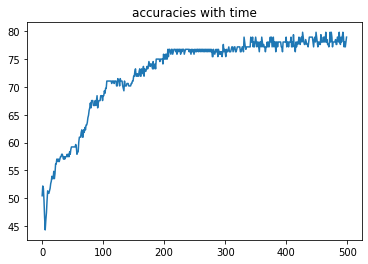

best weights:  [-0.023625211146979477, 0.018778728412125, 0.09687985869456792, -0.01600469695446354, 0.4360274262594645, -0.002196244230574364]


In [45]:
myslp = slp(thresh, c, [n1, n2, n3, n4, n5, n6])
myslp.training(int(input("Enter the number of epochs:\t")), inputs, outputs)

import matplotlib.pyplot as plt
plt.plot(myslp.accuracies)
plt.title('accuracies with time')
plt.show()

max_acc = max(myslp.accuracies)
max_index = myslp.accuracies.index(max_acc)
best_weights = myslp.weight_log[max_index]
print("best weights: ", best_weights)

In [46]:
best_weights = [-0.04474501103384887, 0.019309246725076966, 0.09594388284299246,
-0.03536095737989012, 0.46637396064940045, 0.021523510357524298]
bestn1 = Node(best_weights[0])
bestn2 = Node(best_weights[1])
bestn3 = Node(best_weights[2])
bestn4 = Node(best_weights[3])
bestn5 = Node(best_weights[4])
bestn6 = Node(best_weights[5])
best_model = slp(thresh, c, [bestn1, bestn2, bestn3, bestn4, bestn5, bestn6])

In [47]:
testdf = pd.read_csv('LogRes_Test.csv')
testdf = testdf.sample(frac = 1)
testdf.head()

,Latitude,Longitude,Altitude,min Temo,Max Temp,Sunshine Hour,Solar Radiation
2,25.34,91.53,1598,19.1,20.2,3.100000,0
1,28.35,77.12,216,9.1,19.9,0.621429,0
26,8.50,76.90,64,24.6,28.7,0.550000,1
3,25.34,91.53,1598,9.4,10.5,5.800000,0
42,8.50,76.90,64,25.4,32.2,0.642857,1


In [48]:
x_test = testdf.iloc[:,:6]
x_test = x_test.to_numpy()
x_test = normalize(x_test)

y_test = testdf.iloc[:,6]
y_test = y_test.to_numpy()

In [50]:
y_pred = best_model.testing(x_test, y_test)

desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  1
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  1
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  0
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  1
desired =  1 | predicted =  0
desired =  1 | predicted =  1
desired =  1 | predicted =  1
desired =  1 | predicted =  1
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  0
desired =  1 | predicted =  1
desired =  1 | predicted =  0
desired =  0 | predicted =  0
desired =  0 | predicted =  0
desired =  1 | predicted =  1
desired = 

In [51]:
import matplotlib.pyplot as plt

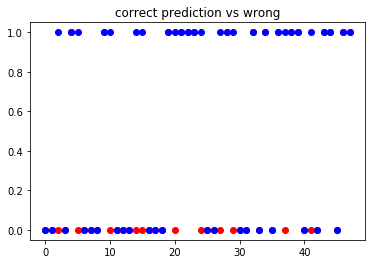

In [52]:
plt.plot(y_pred, 'ro')
plt.plot(y_test, 'bo')
plt.title('correct prediction vs wrong')
plt.show()

In [53]:
mets = best_model.metrics(x_test, y_test)

Confusion Matrix: 
[ [16, 0] 
 [11, 21] ]
accuracy:  0.7708333333333334 
precision:  1.0 
recall:  0.5925925925925926 
specificity:  1.0 
f1 score:  2.3703703703703702
